# Classification

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns, statsmodels.api as sm

In [2]:
from ISLP import load_data
from ISLP.models import ModelSpec as MS, summarize

In [3]:
from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis as LDA,
    QuadraticDiscriminantAnalysis as QDA,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [4]:
import warnings

warnings.filterwarnings("ignore")

## Q13

### (a)

In [5]:
weekly = load_data("Weekly")

In [6]:
weekly.sample(5)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
180,1993,0.303,-0.527,0.509,-0.393,0.884,0.248836,0.230,Up
623,2002,0.506,-1.573,-2.295,0.990,1.409,1.422175,-0.978,Down
793,2005,0.411,0.831,-3.266,0.706,0.128,2.090184,1.253,Up
64,1991,0.470,-1.348,0.999,1.343,0.037,0.176646,-1.329,Down
553,2000,-1.920,-1.727,0.951,0.987,1.351,1.048240,-1.166,Down


In [7]:
weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


In [8]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [9]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


<Axes: >

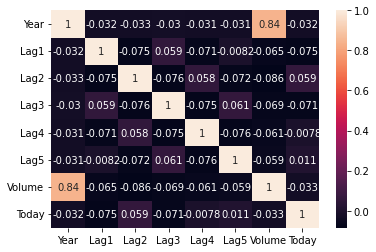

In [10]:
sns.heatmap(weekly.corr(), annot=True)

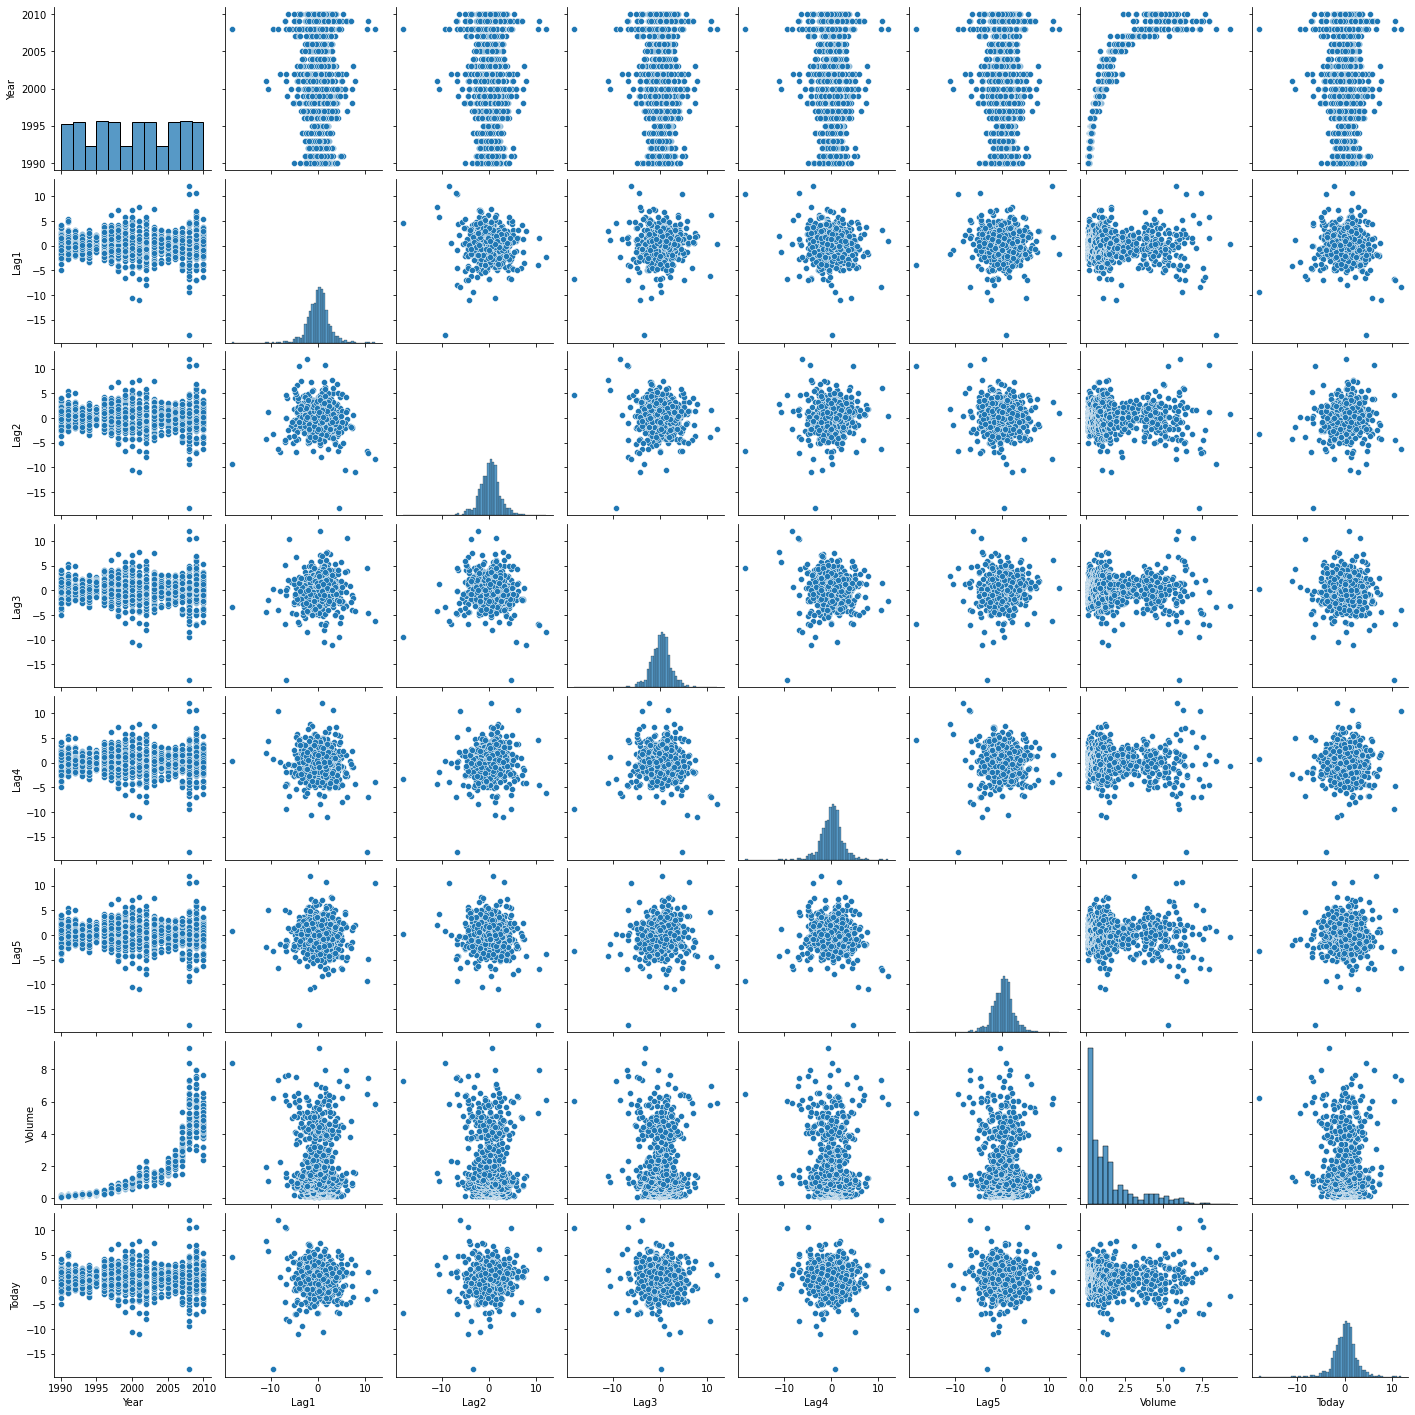

In [11]:
sns.pairplot(weekly)

### (b)

In [12]:
X = MS(weekly.drop(["Year", "Today", "Direction"],
                   axis=1)).fit_transform(weekly)
y = weekly["Direction"] == "Up"
glm8 = sm.GLM(y, X, family=sm.families.Binomial())
results8 = glm8.fit()
summarize(results8)

,coef,std err,z,P>|z|
intercept,0.2669,0.086,3.106,0.002
Lag1,-0.0413,0.026,-1.563,0.118
Lag2,0.0584,0.027,2.175,0.030
Lag3,-0.0161,0.027,-0.602,0.547
Lag4,-0.0278,0.026,-1.050,0.294
Lag5,-0.0145,0.026,-0.549,0.583
Volume,-0.0227,0.037,-0.616,0.538


### (c)

In [13]:
labels8 = np.array(["Down"] * len(X))
labels8[results8.predict() > 0.5] = "Up"
conf_mat8 = confusion_table(labels8, weekly["Direction"])
conf_mat8

Truth,Down,Up
Predicted,,
Down,54,48
Up,430,557


In [14]:
acc_8c = (conf_mat8.Down[0] + conf_mat8.Up[1]) / conf_mat8.sum().sum()
print("Overall fraction of correct predictions is ", acc_8c)

Overall fraction of correct predictions is  0.5610651974288338


### (d)

In [15]:
train = weekly.Year > 2009
weekly_train = weekly.loc[train]
weekly_test = weekly.loc[~train]
L_train, L_test = weekly.Direction.loc[train], weekly.Direction.loc[~train]

In [16]:
weekly_train_X, weekly_test_X = X.loc[train], X.loc[~train]
weekly_train_y, weekly_test_y = y.loc[train], y.loc[~train]
glm8d = sm.GLM(weekly_train_y, weekly_train_X, family=sm.families.Binomial())
results8d = glm8d.fit()
preds8d = results8d.predict(exog=weekly_test_X)
labels8d = np.array(["Down"] * len(weekly_test_X))
labels8d[preds8d > 0.5] = "Up"
conf_mat_8d = confusion_table(labels8d, L_test)
conf_mat_8d

Truth,Down,Up
Predicted,,
Down,31,31
Up,433,542


In [17]:
acc_8d = (conf_mat_8d.Down[0] + conf_mat_8d.Up[1]) / conf_mat_8d.sum().sum()
print("Overall fraction of correct predictions is ", acc_8d)

Overall fraction of correct predictions is  0.5525554484088717


### (e)

In [18]:
lda8 = LDA(store_covariance=True)
weekly_train_X, weekly_test_X = [
    M.drop(columns=["intercept"]) for M in [weekly_train_X, weekly_test_X]
]
lda8.fit(weekly_train_X, weekly_train_y)

LinearDiscriminantAnalysis(store_covariance=True)

In [19]:
preds8e = lda8.predict(weekly_test_X)
preds8e = np.where(preds8e == True, "Up", "Down")
conf_mat_8e = confusion_table(preds8e, L_test)
conf_mat_8e

Truth,Down,Up
Predicted,,
Down,28,28
Up,436,545


In [20]:
acc_8e = (conf_mat_8e.Down[0] + conf_mat_8e.Up[1]) / conf_mat_8e.sum().sum()
print("Overall fraction of correct predictions is ", acc_8e)

Overall fraction of correct predictions is  0.5525554484088717


### (f)

In [21]:
qda8 = QDA(store_covariance=True)
qda8.fit(weekly_train_X, weekly_train_y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [22]:
preds8f = qda8.predict(weekly_test_X)
preds8f = np.where(preds8f == True, "Up", "Down")
conf_mat_8f = confusion_table(preds8f, L_test)
conf_mat_8f

Truth,Down,Up
Predicted,,
Down,42,41
Up,422,532


In [23]:
acc_8f = (conf_mat_8f.Down[0] + conf_mat_8f.Up[1]) / conf_mat_8f.sum().sum()
print("Overall fraction of correct predictions is ", acc_8f)

Overall fraction of correct predictions is  0.553519768563163


### (g)

In [24]:
knn8 = KNeighborsClassifier(n_neighbors=1)
knn8.fit(weekly_train_X, L_train)
preds8g = knn8.predict(weekly_test_X)
conf_mat_8g = confusion_table(preds8g, L_test)
conf_mat_8g

Truth,Down,Up
Predicted,,
Down,95,109
Up,369,464


In [25]:
acc_8g = (conf_mat_8g.Down[0] + conf_mat_8g.Up[1]) / conf_mat_8g.sum().sum()
print("Overall fraction of correct predictions is ", acc_8g)

Overall fraction of correct predictions is  0.5390549662487946


### (h)

In [26]:
NB8 = GaussianNB()
NB8.fit(weekly_train_X, L_train)

GaussianNB()

In [27]:
preds8h = NB8.predict(weekly_test_X)
conf_mat_8h = confusion_table(preds8h, L_test)
conf_mat_8h

Truth,Down,Up
Predicted,,
Down,27,27
Up,437,546


In [28]:
acc_8h = (conf_mat_8h.Down[0] + conf_mat_8h.Up[1]) / conf_mat_8h.sum().sum()
print("Overall fraction of correct predictions is ", acc_8h)

Overall fraction of correct predictions is  0.5525554484088717


### (i)

In [29]:
print("Logistic Regression:", np.round(acc_8d * 100, 2))
print("LDA: ", np.round(acc_8e * 100, 2))
print("QDA: ", np.round(acc_8f * 100, 2))
print("KNN with K=1: ", np.round(acc_8g * 100, 2))
print("Naive Bayes: ", np.round(acc_8h * 100, 2))

Logistic Regression: 55.26
LDA:  55.26
QDA:  55.35
KNN with K=1:  53.91
Naive Bayes:  55.26


### (j)

## Q14

In [30]:
Auto = load_data("Auto")

### (a)

In [31]:
Auto.mpg.median()

22.75

In [32]:
Auto["mpg01"] = np.zeros(len(Auto), dtype=int)
Auto.loc[Auto.mpg > Auto.mpg.median(), "mpg01"] = 1

In [33]:
Auto.sample(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
315,34.3,4,97.0,78,2188,15.8,80,2,audi 4000,1
321,27.9,4,156.0,105,2800,14.4,80,1,dodge colt,1
380,25.0,6,181.0,110,2945,16.4,82,1,buick century limited,1
218,33.5,4,85.0,70,1945,16.8,77,3,datsun f-10 hatchback,1


### (b)

In [34]:
Auto.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name', 'mpg01'],
      dtype='object')

<Axes: >

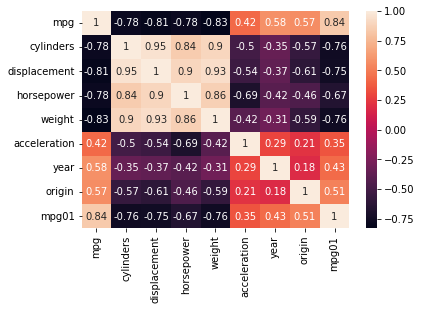

In [35]:
sns.heatmap(Auto.corr(), annot=True)

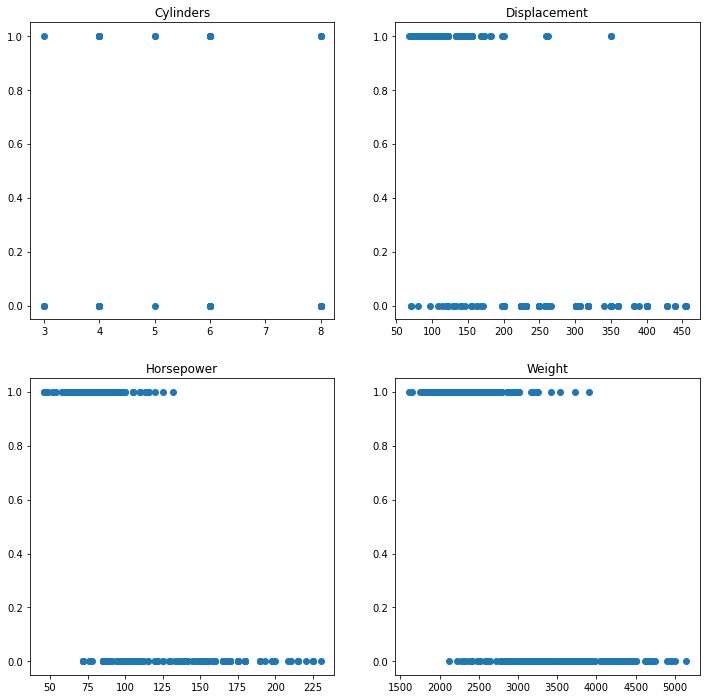

In [36]:
fig, ax = plt.subplots(2, 2, figsize=(12, 12))

ax[0, 0].scatter(Auto.cylinders, Auto.mpg01)
ax[0, 0].set_title("Cylinders")
ax[0, 1].scatter(Auto.displacement, Auto.mpg01)
ax[0, 1].set_title("Displacement")
ax[1, 0].scatter(Auto.horsepower, Auto.mpg01)
ax[1, 0].set_title("Horsepower")
ax[1, 1].scatter(Auto.weight, Auto.mpg01)
ax[1, 1].set_title("Weight")

plt.show()

In [37]:
# plt.subplot(2,2,1)
# sns.scatterplot(Auto.cylinders, Auto.mpg01)
# plt.title("cylinders")

# plt.subplot(2,2,2)
# sns.scatterplot(Auto.displacement, Auto.mpg01)
# plt.title("displacement")

# plt.subplot(2,2,3)
# sns.scatterplot(Auto.horsepower, Auto.mpg01)
# plt.title("horsepower")

# plt.subplot(2,2,4)
# sns.scatterplot(Auto.acceleration, Auto.mpg01 )
# plt.title("acceleration")

# plt.subplots_adjust(left=0.1,
#                     bottom=0.1,
#                     right=0.9,
#                     top=0.9,
#                     wspace=0.4,
#                     hspace=0.8)
# plt.show()

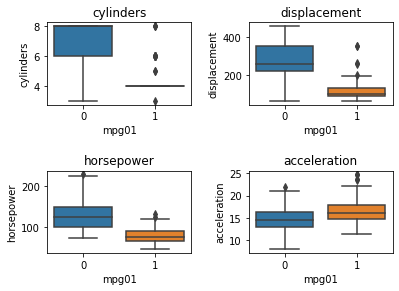

In [38]:
plt.subplot(2, 2, 1)
sns.boxplot(Auto.mpg01, Auto.cylinders)
plt.title("cylinders")

plt.subplot(2, 2, 2)
sns.boxplot(Auto.mpg01, Auto.displacement)
plt.title("displacement")

plt.subplot(2, 2, 3)
sns.boxplot(Auto.mpg01, Auto.horsepower)
plt.title("horsepower")

plt.subplot(2, 2, 4)
sns.boxplot(Auto.mpg01, Auto.acceleration)
plt.title("acceleration")

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)
plt.show()

### (c)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    MS(Auto[["cylinders", "displacement", "horsepower",
             "weight"]]).fit_transform(Auto),
    Auto.mpg01,
    test_size=0.2,
    random_state=101,
)

### (d)

In [40]:
lda = LDA(store_covariance=True)
X_train, X_test = [M.drop(columns=["intercept"]) for M in [X_train, X_test]]
lda.fit(X_train, y_train)
accuracy_score(y_test, lda.predict(X_test))

0.9367088607594937

### (e)

In [41]:
qda = QDA(store_covariance=True)
qda.fit(X_train, y_train)
accuracy_score(y_test, qda.predict(X_test))

0.9367088607594937

### (f)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    MS(Auto[["cylinders", "displacement", "horsepower",
             "weight"]]).fit_transform(Auto),
    Auto.mpg01,
    test_size=0.2,
    random_state=101,
)

In [43]:
model9f = sm.GLM(y_train, X_train, family=sm.families.Binomial())
results9f = model9f.fit()
preds9f = results9f.predict(X_test)
labels9f = np.zeros(len(y_test))
labels9f[preds9f >= 0.5] = 1
accuracy_score(y_test, labels9f)

0.9113924050632911

### (g)

In [44]:
NB = GaussianNB()
NB.fit(X_train, y_train)
nb_preds = NB.predict(X_test)
accuracy_score(y_test, nb_preds)

0.9493670886075949

### (h)

In [45]:
knn_acc = []
for i in range(50):
    knn = KNeighborsClassifier(n_neighbors=i + 1)
    knn.fit(X_train, y_train)
    knn_acc.append(accuracy_score(y_test, knn.predict(X_test)))
print("K =", np.argmax(knn_acc) + 1)
print("accuracy =", max(knn_acc))

K = 13
accuracy = 0.9240506329113924


## Q15

### (a)

In [46]:
def Power():
    print(2**3)

### (b)

In [47]:
def Power2(x, a):
    print(x**a)

In [48]:
Power2(3, 8)

6561


### (c)

In [49]:
Power2(10, 3)
Power2(8, 17)
Power2(131, 3)

1000
2251799813685248
2248091


### (d)

In [50]:
def Power3(x, a):
    return x**a

### (e)

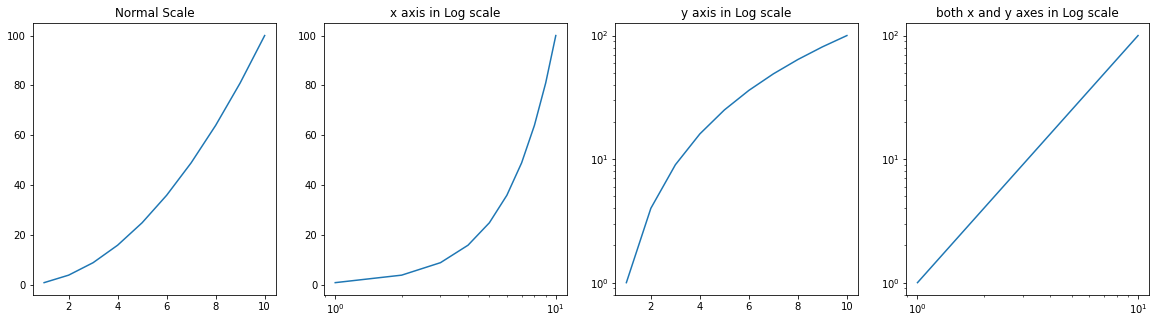

In [51]:
x_axis = np.arange(1, 11)
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

ax[0].plot(x_axis, Power3(x_axis, 2))
ax[0].set_title("Normal Scale")

ax[1].plot(x_axis, Power3(x_axis, 2))
ax[1].set_title("x axis in Log scale")
ax[1].set_xscale("log")

ax[2].plot(x_axis, Power3(x_axis, 2))
ax[2].set_title("y axis in Log scale")
ax[2].set_yscale("log")

ax[3].plot(x_axis, Power3(x_axis, 2))
ax[3].set_title("both x and y axes in Log scale")
ax[3].set_xscale("log")
ax[3].set_yscale("log")

plt.show()

### (f)

In [52]:
def PlotPower(x, a):
    plt.figure(figsize=(8, 8))
    plt.plot(x, Power3(x, a))
    plt.show()

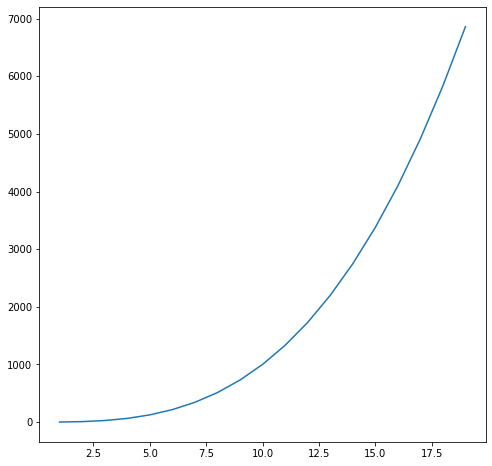

In [53]:
PlotPower(np.arange(1, 20), 3)

## Q16

In [54]:
Boston = load_data("Boston")

In [61]:
Boston.sample(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv,crim01
140,0.29090,0.0,21.89,0,0.624,6.174,93.6,1.6119,4,437,21.2,24.16,14.0,1
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
263,0.82526,20.0,3.97,0,0.647,7.327,94.5,2.0788,5,264,13.0,11.25,31.0,1


In [59]:
Boston["crim01"] = np.zeros(len(Boston), dtype=int)
Boston.loc[Boston["crim"] > Boston.crim.median(), "crim01"] = 1

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    MS(Boston.drop(["crim", "crim01"], axis=1)).fit_transform(Boston),
    Boston.crim01,
    test_size=0.2,
    random_state=101,
)

In [75]:
lda = LDA(store_covariance=True)
DA_X_train, DA_X_test = [
    M.drop(columns=["intercept"]) for M in [X_train, X_test]
]
lda_fit = lda.fit(DA_X_train, y_train)
lda_pred = lda_fit.predict(DA_X_test)
lda_acc = accuracy_score(y_test, lda_pred)

In [76]:
qda = QDA(store_covariance=True)
qda_fit = qda.fit(DA_X_train, y_train)
qda_pred = qda_fit.predict(DA_X_test)
qda_acc = accuracy_score(y_test, qda_pred)

In [82]:
log_reg = sm.GLM(y_train, X_train, family=sm.families.Binomial()).fit()
log_reg_pred = log_reg.predict(X_test)
log_reg_labels = np.zeros(len(y_test), dtype=int)
log_reg_labels[log_reg_pred >= 0.5] = 1
log_reg_acc = accuracy_score(y_test, log_reg_labels)

In [83]:
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_acc = accuracy_score(y_test, NB.predict(X_test))

In [84]:
knn_acc = list()
for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    knn_acc.append(accuracy_score(y_test, knn.predict(X_test)))

knn_acc_final = [max(knn_acc), np.argmax(knn_acc)]

In [87]:
print("Accuracy for Logistic Regression is ", np.round(log_reg_acc, 2))
print("Accuracy for Linear Discriminant Analysis is ", np.round(lda_acc, 2))
print("Accuracy for Quadratic Discriminant Analysis is ", np.round(qda_acc, 2))
print("Accuracy for Naive Bayes is ", np.round(NB_acc, 2))
print(
    "Accuracy for K-Nearest Neighbor is ",
    np.round(knn_acc_final[0], 2),
    "for K =",
    knn_acc_final[1],
)

Accuracy for Logistic Regression is  0.88
Accuracy for Linear Discriminant Analysis is  0.83
Accuracy for Quadratic Discriminant Analysis is  0.84
Accuracy for Naive Bayes is  0.77
Accuracy for K-Nearest Neighbor is  0.96 for K = 9
